# All beta sheet proteins and ProtGPT2

# This is preliminary work for a project using ProtGPT2: The aim is to create training and validation datasets for later use with ProtGPT2. Here, fasta protein sequences are processed into lines of 60 characters per line, and each sequence is given a header <|endoftext|>, as required by ProtGPT2.

# The ultimate goal of this work would be to generate novel protein sequences using ProtGPT2, a generative language model trained on protein sequences, that are all beta sheet in structure.

# Briefly, a protein sequence with all beta sheet structure was found in the protein  data bank , PDB. This sequence was then BLASTED and protein sequences with high similarity to that sequence were downloaded as fasta files. This procedure was repeated for different all beta sheet proteins. The fasta sequences were then concatnated into a single file. 

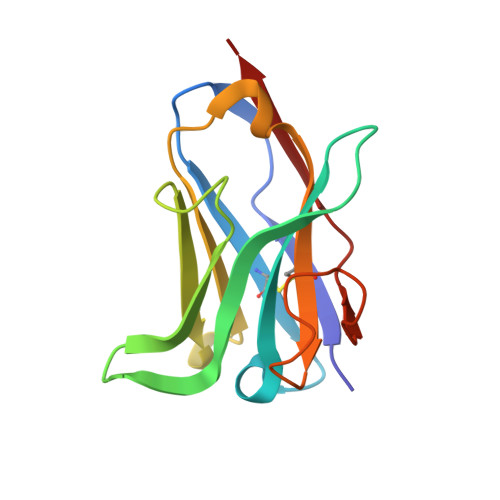

## work and code by Scott W. Lew

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import re
import nltk
import math
import os
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [ ]:
def fasta_parser(filename):
    if os.path.exists(filename):
        pass
    else:                     
        print("The file, %s, does not exist" % filename)
        
    file = open(filename,mode='r')
    rec_all = file.read()
    file.close()
    # remove all whitespace from string all_of_it
    rec_all = rec_all.replace(' ','')
    # split records by > 
    records = rec_all.split('>')
    # Parse out the headers & sequences for each record
    headers = []
    sequences = []
    for rec in records:
        s = ''
        data = rec.split('\n')
        sq = s.join(data[1:])
        if len(data[0]) > 0:
            headers.append(data[0])
   
        if (len(sq) > 0):
            sequences.append(s.join(data[1:]))
    
    return headers, sequences

In [ ]:
# parse extracellular protein fasta data
#beta_head, beta_seqs = fasta_parser('fredo.fasta')

#beta_head, beta_seqs = fasta_parser('bos_galectin.fasta')
beta_head, beta_seqs = fasta_parser('meow.fasta')

In [ ]:
print(len(beta_seqs))

In [ ]:
beta_scores = []

for seq in beta_seqs:
    beta_score = ProteinAnalysis(seq).secondary_structure_fraction()[2]
    beta_scores.append(beta_score)

In [ ]:
print(len(beta_scores))

In [ ]:
print(np.mean(beta_scores))

In [ ]:
print(np.min(beta_scores))

In [ ]:
print(np.max(beta_scores))

In [ ]:
# create protein dataframe in pandas
d = {'headers':beta_head , 'sequences':beta_seqs }
df = pd.DataFrame(data=d)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
# scramble the dataframe to mix up the sequences
# permute/scramble/shuffle rows of the dataframe
df = df.sample(frac=1)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
# splitting dataframe by row index
beta_train = df.iloc[:560,:]
beta_valid = df.iloc[560:,:]

In [ ]:
print(beta_train.shape)
print()
print(beta_valid.shape)
print()

In [ ]:
print(len(beta_train.sequences))
print()
print(len(beta_valid.sequences))
print()

In [ ]:
beta_train.head()

In [ ]:
beta_valid.head()

In [ ]:
# inspiration for writing out pseudo-fasta files 
# modified the code for pseudo-header needed for protGPT2
# https://github.com/zaneveld/full_spectrum_bioinformatics/blob/master/content/06_biological_sequences/reading_and_writing_fasta_files.ipynb

In [ ]:
# define function that can break a protein sequence
# into lines of desired number of characters/amino acids, line_length.
def break_sequence(sequence, line_length):
    broken_sequence = ""
    for i in range(0, len(sequence), line_length):
        broken_sequence += sequence[i:i+line_length] + "\n"
    return broken_sequence


In [ ]:
# test the function

for seq in beta_train.sequences:
    
    # Break the sequence into lines of 60 characters
    broken_sequence = break_sequence(seq, 60)
    print(broken_sequence)
    print()

In [ ]:
output_path = 'beta_train.txt'
output_file = open(output_path,'w')

In [ ]:
# write the sequence so that only
# 60 characters are in a line
# write sequences with "<|endoftext|>" header to beta_train.txt file, training file
for seq in beta_train.sequences:
    identifier_line = "<|endoftext|>" + "\n"
    output_file.write(identifier_line)
    
    # Break the sequence into lines of 60 characters
    broken_sequence = break_sequence(seq, 60)

    output_file.write(broken_sequence)
    
#Close the file when we're done
output_file.close()

In [ ]:
output_path = 'beta_valid.txt'
output_file = open(output_path,'w')

In [ ]:
# write sequences with "<|endoftext|>" header to beta_valid.txt file, validation file
for seq in beta_valid.sequences:
    identifier_line = "<|endoftext|>" + "\n"
    output_file.write(identifier_line)
    
    # Break the sequence into lines of 60 characters
    broken_sequence = break_sequence(seq, 60)
    
    output_file.write(broken_sequence)
    
#Close the file when we're done
output_file.close()